# Compare mapconsf versus mapcons2nd

Only modifying mapping option for SW and LW 

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.m6plot import xycompare
from mom6_tools.MOM6grid import MOM6grid

Basemap module not found. Some regional plots may not function properly


In [4]:
path1 = '/glade/scratch/gmarques/g.c2b6.GNYF.T62_t061.nuopc_dev_ncar.003/run/'
path2 = '/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.nuopc_mapcons2nd_test.001/run/'

grd = MOM6grid(path1+'g.c2b6.GNYF.T62_t061.nuopc_dev_ncar.003.mom6.static.nc')

MOM6 grid successfully loaded... 



## mapconsf

In [10]:
mapconsf = xr.open_mfdataset(path1+"g.c2b6.GNYF.T62_t061.nuopc_dev_ncar.003.cpl.hi.*.nc", decode_times=False, 
                       combine='by_coords')

## mapcons2nd

In [11]:
mapcons2nd = xr.open_mfdataset(path2+"g.c2b6.GJRA.TL319_t061.nuopc_mapcons2nd_test.001.cpl.hi.*.nc", decode_times=False, 
                       combine='by_coords')

In [27]:
for var in mapcons2nd.variables:
    print(var)

time
atmImp_Faxa_lwdn
atmImp_Faxa_rainc
atmImp_Faxa_rainl
atmImp_Faxa_snowc
atmImp_Faxa_snowl
atmImp_Faxa_swdn
atmImp_Faxa_swndf
atmImp_Faxa_swndr
atmImp_Faxa_swnet
atmImp_Faxa_swvdf
atmImp_Faxa_swvdr
atmImp_Sa_dens
atmImp_Sa_pbot
atmImp_Sa_pslv
atmImp_Sa_ptem
atmImp_Sa_shum
atmImp_Sa_tbot
atmImp_Sa_u
atmImp_Sa_v
atmImp_Sa_z
atmImp_lon
atmImp_lat
Med_frac_atm_afrac
Med_frac_atm_ifrac
Med_frac_atm_lfrac
Med_frac_atm_lfrin
Med_frac_atm_ofrac
Med_frac_atm_lon
Med_frac_atm_lat
ocnImp_Fioo_q
ocnImp_So_bldepth
ocnImp_So_dhdx
ocnImp_So_dhdy
ocnImp_So_omask
ocnImp_So_s
ocnImp_So_t
ocnImp_So_u
ocnImp_So_v
ocnImp_lon
ocnImp_lat
ocnExp_Faxa_rain
ocnExp_Faxa_snow
ocnExp_Fioi_melth
ocnExp_Fioi_meltw
ocnExp_Fioi_salt
ocnExp_Foxx_evap
ocnExp_Foxx_lwnet
ocnExp_Foxx_rofi
ocnExp_Foxx_rofl
ocnExp_Foxx_sen
ocnExp_Foxx_swnet_idf
ocnExp_Foxx_swnet_idr
ocnExp_Foxx_swnet_vdf
ocnExp_Foxx_swnet_vdr
ocnExp_Foxx_taux
ocnExp_Foxx_tauy
ocnExp_Sa_pslv
ocnExp_lon
ocnExp_lat
Med_frac_ocn_afrac
Med_frac_ocn_ifrac
Med_f

### Variable names to be compared

In [28]:
pairs = [
("ocnExp_Faxa_rain", "x2oacc_Faxa_rain"),
("ocnExp_Faxa_snow", "x2oacc_Faxa_snow"),
("ocnExp_Fioi_melth", "x2oacc_Fioi_melth"),
("ocnExp_Fioi_meltw", "x2oacc_Fioi_meltw"),
("ocnExp_Fioi_salt", "x2oacc_Fioi_salt"),
("ocnExp_Foxx_evap", "x2oacc_Foxx_evap"),
("ocnExp_Foxx_rofi", "x2oacc_Foxx_rofi"),
("ocnExp_Foxx_rofl", "x2oacc_Foxx_rofl"),
("ocnExp_Foxx_sen", "x2oacc_Foxx_sen"),
("ocnExp_Foxx_taux", "x2oacc_Foxx_taux"),
("ocnExp_Foxx_tauy", "x2oacc_Foxx_tauy"),
("ocnExp_Sa_pslv", "x2oacc_Sa_pslv"),
("ocnImp_So_s", "o2x_So_s"),
("ocnImp_So_t", "o2x_So_t"),
("ocnImp_So_u", "o2x_So_u"),
("ocnImp_So_v", "o2x_So_v"),
("ocnImp_So_dhdx", "o2x_So_dhdx"),
("ocnImp_So_dhdy", "o2x_So_dhdy"),
("ocnImp_So_bldepth", "o2x_So_bldepth"),
#("ocnImp_So_fswpen", "x2oacc_Foxx_swnet"),
("ocnImp_Fioo_q", "o2x_Fioo_q")
]    

variables = ["ocnExp_Foxx_lwnet", "ocnExp_Foxx_swnet_idf", "ocnExp_Foxx_swnet_idr", "ocnExp_Foxx_swnet_vdf",
             "ocnExp_Foxx_swnet_vdr", "ocnExp_Foxx_sen"]

mapconsf time (hours) =  1.0
mapcons2nd time (hours) =  1.0


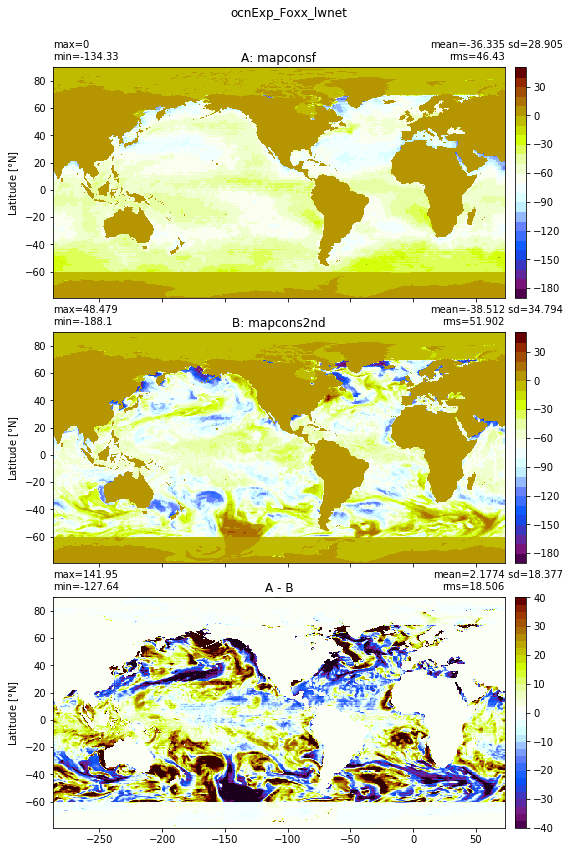

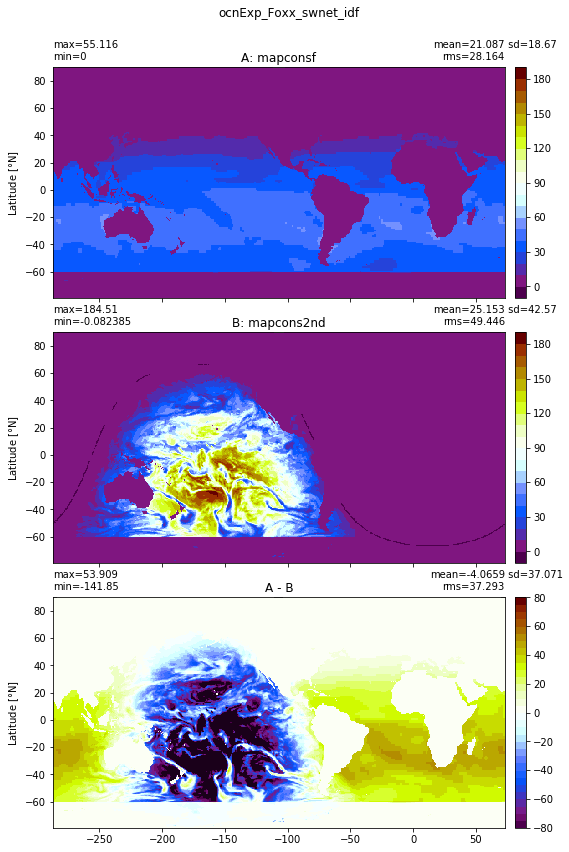

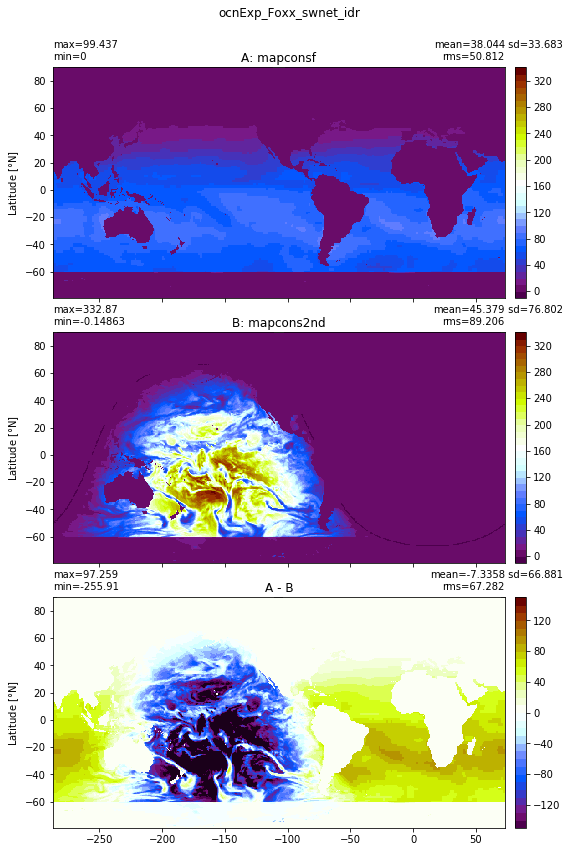

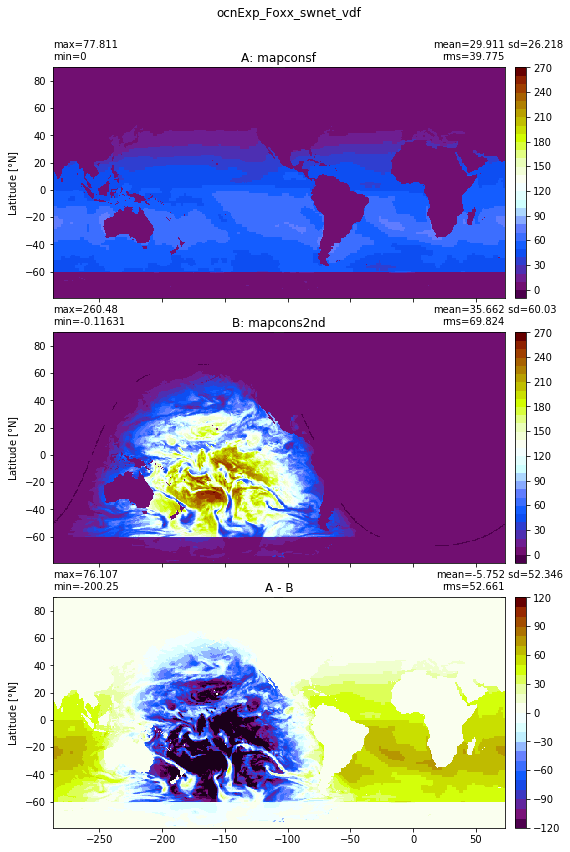

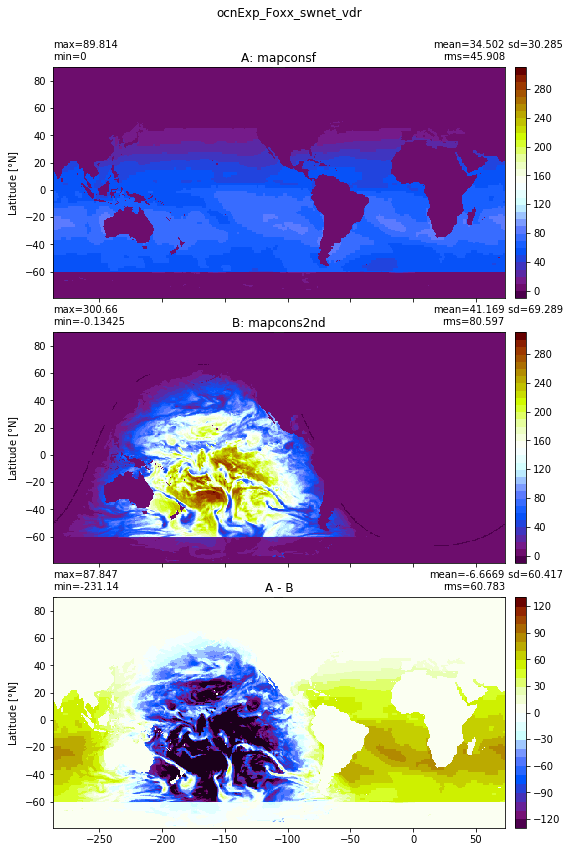

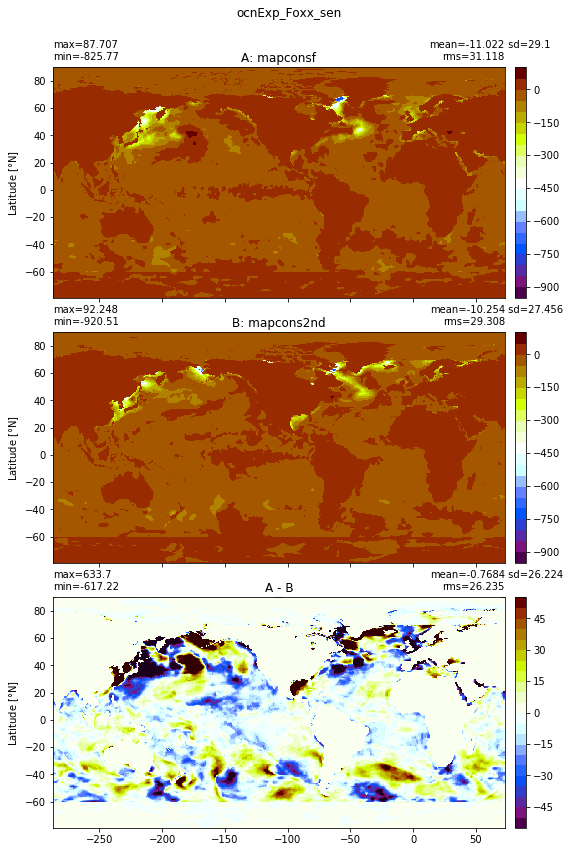

In [35]:
%matplotlib inline
t = 0 # time indice
print('mapconsf time (hours) = ',mapconsf['time'][t].values)
print('mapcons2nd time (hours) = ',mapcons2nd['time'][t].values)

for v in variables:
    #print(pairs[p])
    var1 = mapconsf[v][0,:].values
    var2 = mapcons2nd[v][0,:].values
    xycompare(var1, var2, x=grd.geolon, y=grd.geolat, area=grd.area_t, title1='mapconsf', title2='mapcons2nd', suptitle=v)